In [67]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [68]:
df = pd.read_csv('winequality-red.csv')  

In [69]:
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [70]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [71]:
print(df.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [72]:

# Kiểm tra giá trị thiếu
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


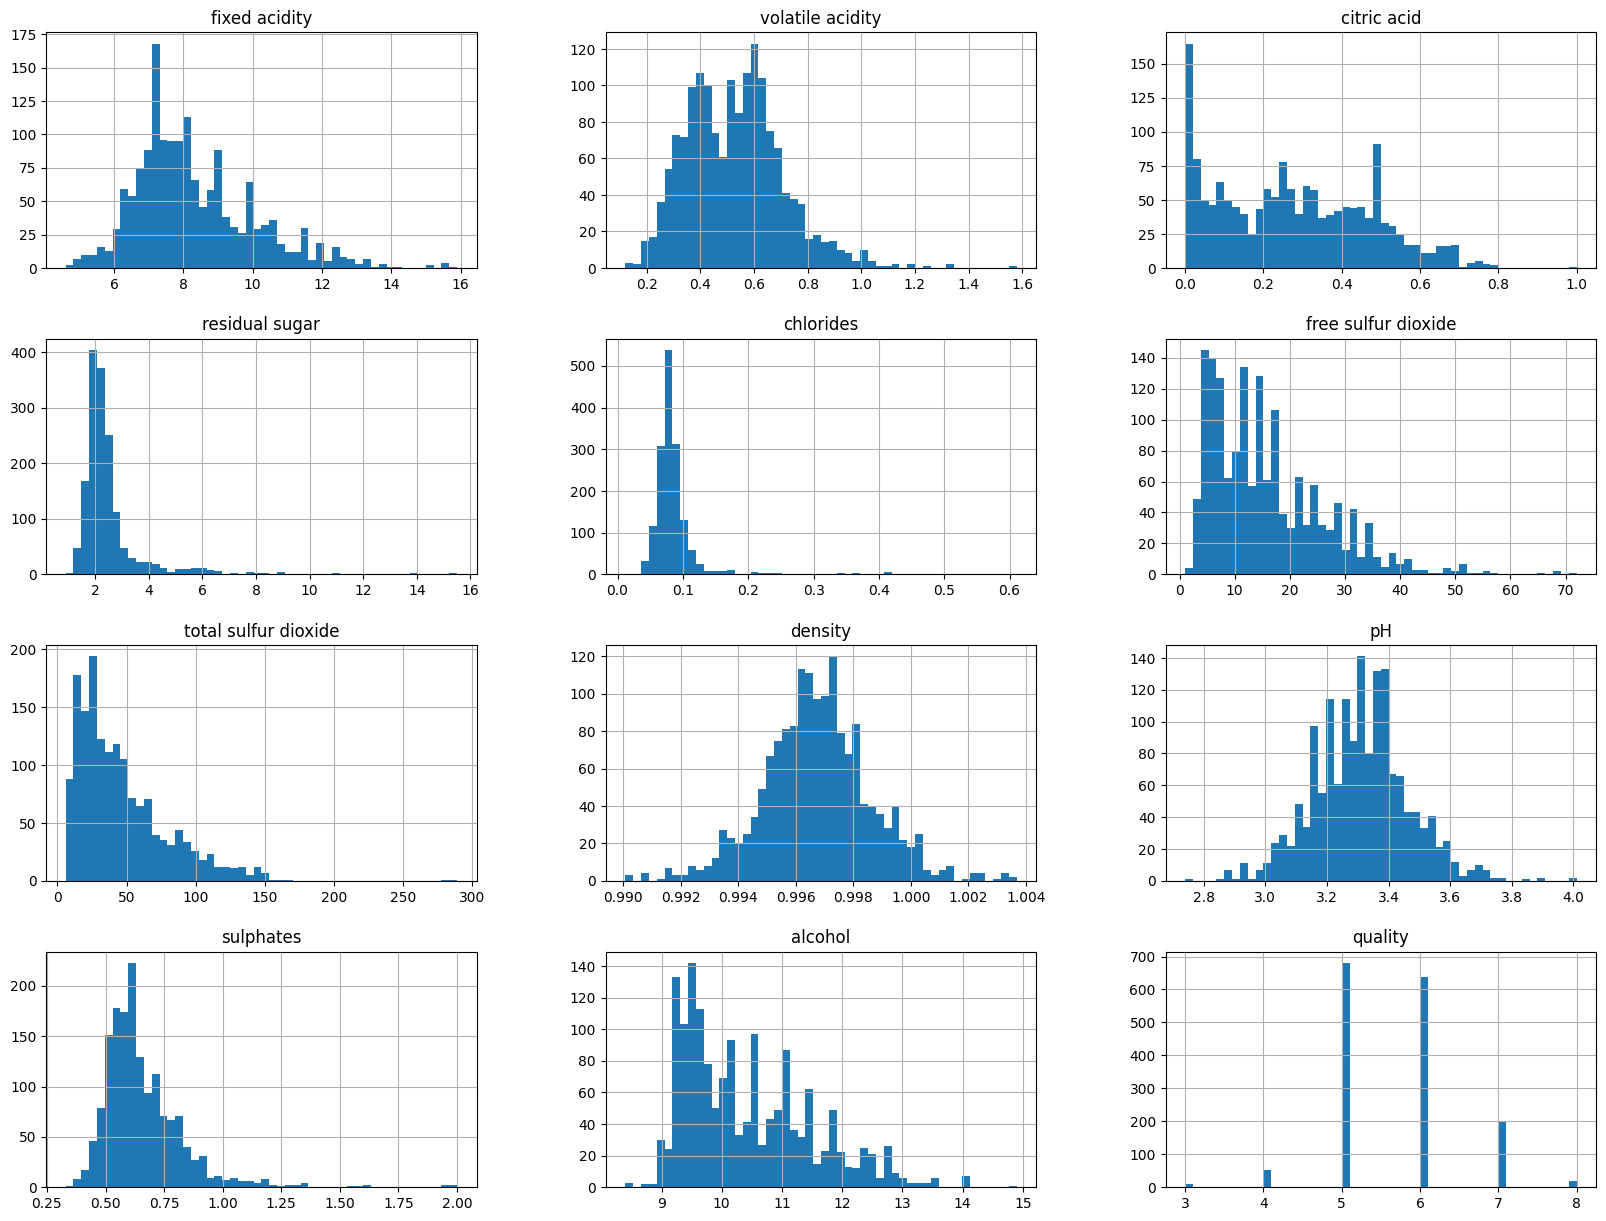

In [73]:

# Vẽ biểu đồ phân phối của các biến
df.hist(bins=50, figsize=(20, 15))
plt.show()


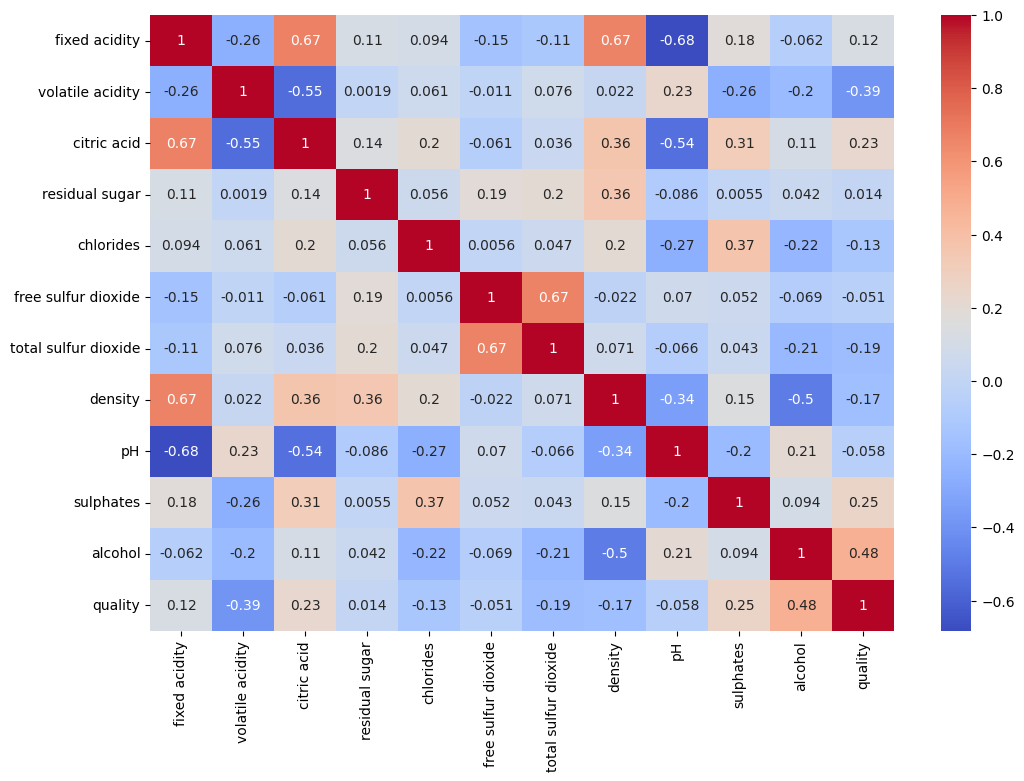

In [74]:

# Vẽ biểu đồ tương quan giữa các biến
plt.figure(figsize=(12, 8))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [75]:
X = df.drop('quality', axis=1)  
y = df['quality']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
alpha_values = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso = Lasso()
grid_search = GridSearchCV(lasso, alpha_values, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_lasso = grid_search.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)

print(f"Best alpha: {grid_search.best_params_['alpha']}")


Best alpha: 0.01


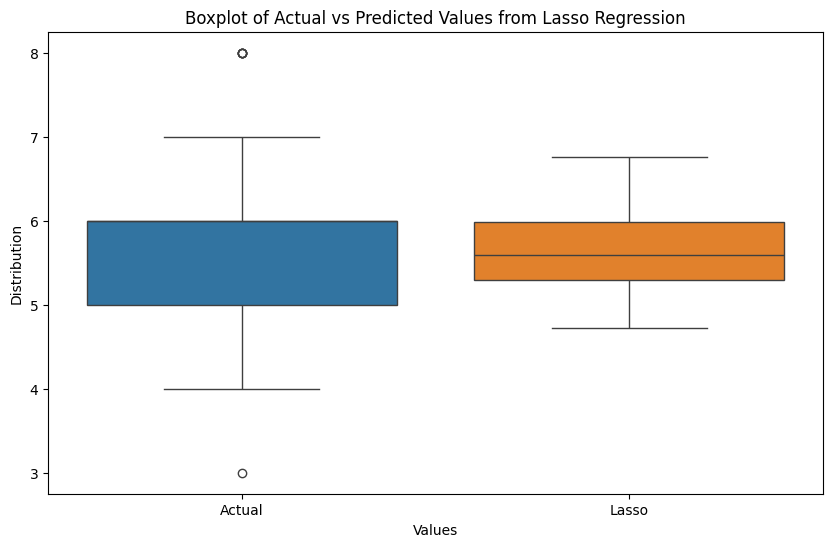

In [77]:
results = pd.DataFrame({
    'Actual': y_test,
    'Lasso': y_pred_lasso
})

# Vẽ biểu đồ box so sánh giá trị thực tế và giá trị dự đoán từ các mô hình
plt.figure(figsize=(10, 6))
sb.boxplot(data=results)
plt.xlabel('Values')
plt.ylabel('Distribution')
plt.title('Boxplot of Actual vs Predicted Values from Lasso Regression')
plt.show()

In [78]:
poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

linear_reg = LinearRegression()
linear_reg.fit(X_train_poly, y_train)
y_pred_linear = linear_reg.predict(X_test_poly)

Tạo các tính năng đa thức: Sử dụng PolynomialFeatures để tạo các tính năng đa thức từ dữ liệu ban đầu.

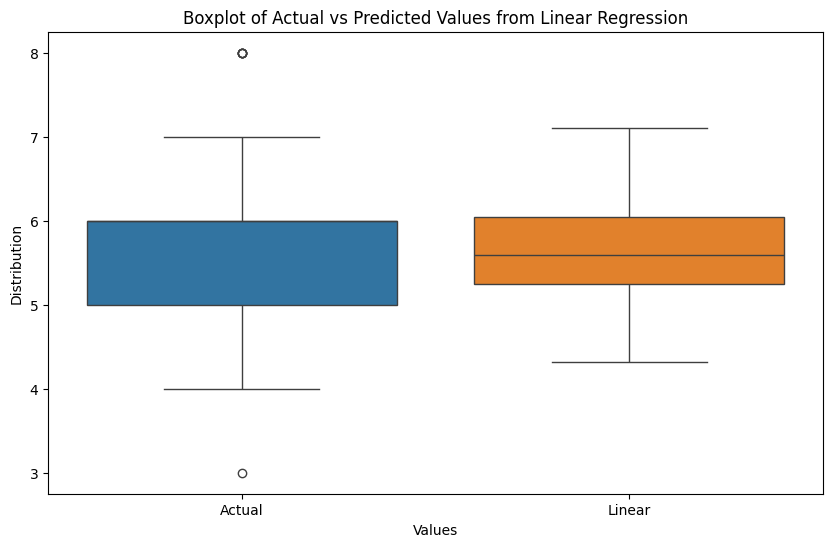

In [79]:
results = pd.DataFrame({
    'Actual': y_test,
    'Linear': y_pred_linear
})

# Vẽ biểu đồ box so sánh giá trị thực tế và giá trị dự đoán từ các mô hình
plt.figure(figsize=(10, 6))
sb.boxplot(data=results)
plt.xlabel('Values')
plt.ylabel('Distribution')
plt.title('Boxplot of Actual vs Predicted Values from Linear Regression')
plt.show()

In [80]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42)
mlp_reg.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_reg.predict(X_test_scaled)
# Tăng số lượng lần lặp (iterations): Tăng giá trị max_iter từ 500 lên 1000 để cho phép mô hình có thêm thời gian để hội tụ .-.

In [81]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

In [82]:
print(f"Lasso - MAE: {mae_lasso}, RMSE: {rmse_lasso}, R-squared: {r2_lasso}")
print(f"Linear Regression - MAE: {mae_linear}, RMSE: {rmse_linear}, R-squared: {r2_linear}")
print(f"MLP Regressor - MAE: {mae_mlp}, RMSE: {rmse_mlp}, R-squared: {r2_mlp}")


Lasso - MAE: 0.5077443121373395, RMSE: 0.6269090970078781, R-squared: 0.39860521482224376
Linear Regression - MAE: 0.49477399099948494, RMSE: 0.6179453872774695, R-squared: 0.4156800644102845
MLP Regressor - MAE: 0.4982272786202608, RMSE: 0.6371514605449924, R-squared: 0.378793659076185


Dựa vào kết quả của các mô hình ban đầu khi max_iter = 500 dưới đây, ta có thể thấy sự khác biệt trong độ chính xác và hiệu suất giữa các mô hình:

1. **Lasso**:
   - **MAE** (Mean Absolute Error): 0.685, tức là sai số trung bình tuyệt đối khá cao so với các mô hình khác.
   - **RMSE** (Root Mean Squared Error): 0.811, cũng cho thấy mức độ sai số lớn hơn.
   - **R-squared**: -0.006, là giá trị âm, cho thấy mô hình không phù hợp với dữ liệu và có thể hoạt động tệ hơn khi so sánh với việc chỉ đoán trung bình của dữ liệu.

2. **Linear Regression**:
   - **MAE**: 0.504, thấp hơn so với Lasso, chứng tỏ rằng Linear Regression có độ chính xác tốt hơn khi dự đoán các giá trị thực tế.
   - **RMSE**: 0.625, nhỏ hơn Lasso, thể hiện sự phù hợp tốt hơn với dữ liệu.
   - **R-squared**: 0.403, cho thấy mô hình Linear Regression có khả năng giải thích khoảng 40% phương sai trong dữ liệu.

3. **MLP Regressor** (Multi-Layer Perceptron):
   - **MAE**: 0.506, gần tương tự với Linear Regression, cho thấy độ chính xác tương đương. 
   - **RMSE**: 0.643, cao hơn một chút so với Linear Regression nhưng vẫn khá gần.
   - **R-squared**: 0.366, thấp hơn Linear Regression, có nghĩa là MLP Regressor không giải thích được phương sai tốt bằng Linear Regression nhưng vẫn có mức hiệu quả tương đối.

=>> **Kết luận**:
- Linear Regression có vẻ là mô hình tốt nhất trong ba mô hình trên với **MAE** và **R-squared** tốt nhất.
- Lasso có hiệu suất kém nhất, đặc biệt với giá trị **R-squared** âm, cho thấy mô hình này không hoạt động tốt trong trường hợp này.
- MLP Regressor cũng là một lựa chọn khả dĩ, tuy nhiên nó có thể không vượt qua Linear Regression trong tình huống này.

   Sau khi cải thiện thì là MLP Regressor - MAE: 0.4982272786202608, RMSE: 0.6371514605449924, R-squared: 0.378793659076185

=>> **Sau khi cải thiện mô hình**:
- **MLP Regressor** có MAE và RMSE tốt nhất, chứng tỏ mô hình này có độ chính xác cao nhất trong ba mô hình.
- **Linear Regression** cũng có hiệu suất khá tốt, với giá trị R-squared cao nhất.
- **Lasso** là mô hình có hiệu suất kém nhất, đặc biệt với giá trị R-squared âm.

In [83]:
results = pd.DataFrame({
    'Actual': y_test,
    'Lasso': y_pred_lasso,
    'Linear': y_pred_linear,
    'MLP': y_pred_mlp,
})


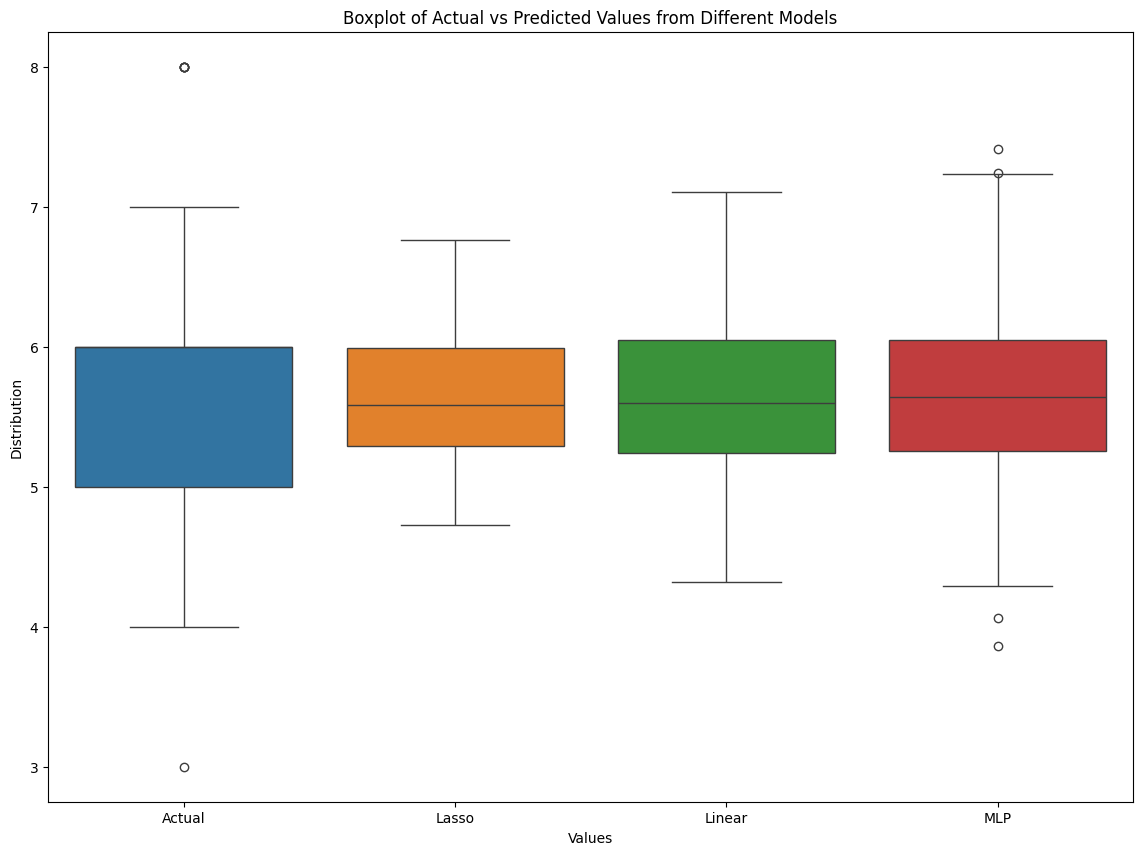

In [84]:
plt.figure(figsize=(14, 10))
sb.boxplot(data=results)
plt.xlabel('Values')
plt.ylabel('Distribution')
plt.title('Boxplot of Actual vs Predicted Values from Different Models')
plt.show()

Actual : Biểu đồ này đại diện cho phân phối của các giá trị thực tế. Phạm vi giữa phần tư thứ nhất và thứ ba (IQR) rộng hơn so với các mô hình dự đoán, và có một số giá trị ngoại lệ (dưới 4 và trên 8).

Lasso: Biểu đồ này rất hẹp, cho thấy mô hình Lasso cho ra các dự đoán gần như không thay đổi trên toàn bộ dữ liệu. Điều này có thể chỉ ra rằng mô hình đang bị underfitting (quá đơn giản), tức là không đủ phức tạp để nắm bắt các đặc điểm của dữ liệu.

Linear Regression: Các dự đoán từ mô hình hồi quy tuyến tính có sự phân bố rộng hơn, gần với phân phối của các giá trị thực tế. Mô hình này dường như nắm bắt được nhiều biến thiên trong dữ liệu hơn, mặc dù vẫn có một số sai lệch.

Neural Network (MLP Regressor): Biểu đồ của MLP tương tự với mô hình hồi quy tuyến tính, nhưng có thêm một số giá trị ngoại lệ. Điều này có thể cho thấy MLP bắt được nhiều sự phức tạp hơn, nhưng cũng có thể dẫn đến việc dự đoán nhiễu hoặc quá khớp (overfitting).

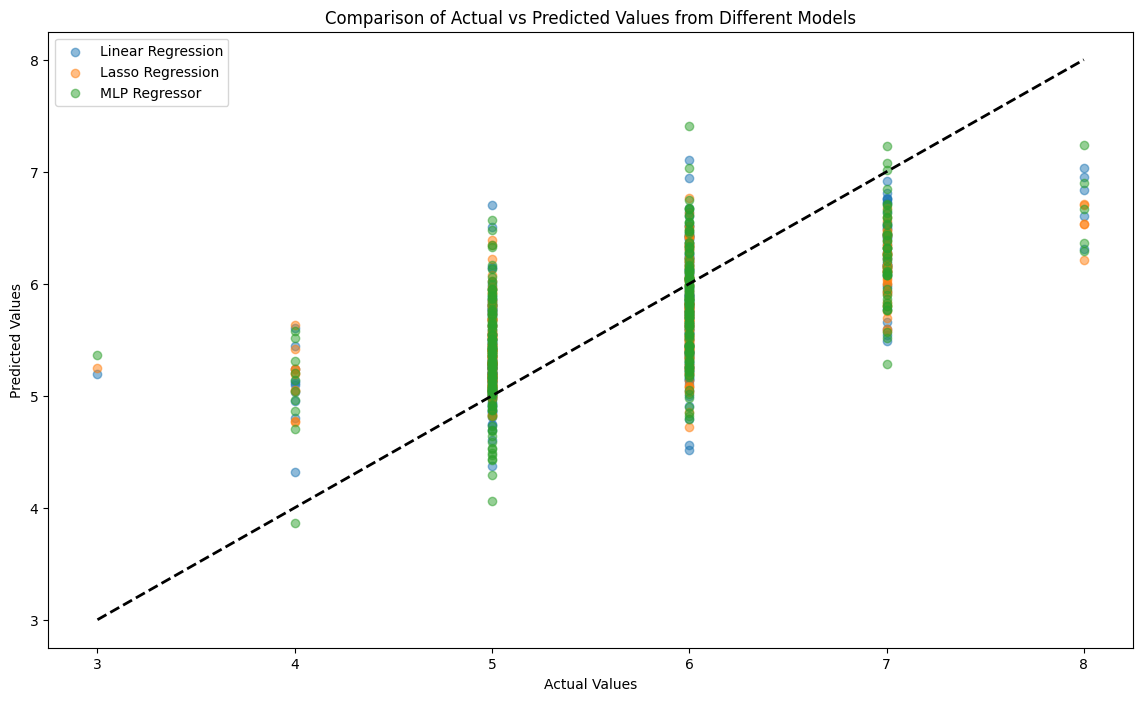

In [86]:
plt.figure(figsize=(14, 8))

# Biểu đồ phân tán cho Linear Regression
plt.scatter(results['Actual'], results['Linear'], label='Linear Regression', alpha=0.5)

# Biểu đồ phân tán cho Lasso Regression
plt.scatter(results['Actual'], results['Lasso'], label='Lasso Regression', alpha=0.5)

# Biểu đồ phân tán cho MLP Regressor
plt.scatter(results['Actual'], results['MLP'], label='MLP Regressor', alpha=0.5)

plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Actual vs Predicted Values from Different Models')
plt.legend()
plt.show()

### Nhận xét từ biểu đồ:
Nét đứt đen đại diện cho đường lý tưởng nơi mà giá trị thực tế và giá trị dự đoán hoàn toàn khớp nhau (y = x).
- Linear Regression (chấm xanh dương): Mô hình có một vài điểm dự đoán bị lệch rõ rệt so với đường lý tưởng, nhất là ở những giá trị nhỏ và lớn.
- Lasso Regression (chấm cam): Dự đoán của mô hình này có xu hướng gần với các giá trị trung bình hơn, nhưng cũng bị lệch tương tự như Linear Regression.
- MLP Regressor (chấm xanh lá): Dự đoán của MLP có vẻ ổn định và ít bị lệch hơn, đặc biệt ở các giá trị trung bình, tuy nhiên, vẫn có một số điểm bị lệch.
### Kết luận:
MLP Regressor có xu hướng dự đoán chính xác hơn ở đa số các giá trị trung bình, nhưng vẫn có một số điểm cực trị không được mô hình hóa tốt.
Linear Regression và Lasso Regression có những dự đoán lệch rõ ràng so với giá trị thực tế ở một số điểm, đặc biệt là ở các giá trị biên.

## Stacking


**Định nghĩa các mô hình cơ sở và mô hình meta:**

In [87]:
base_models = [
    ('linear', LinearRegression()),
    ('lasso', Lasso(alpha=1.0)),
    ('ridge', Ridge(alpha=1.0)),
    ('mlp', MLPRegressor(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42, learning_rate_init=0.001, alpha=0.0001))
]
meta_model = LinearRegression()

**Xây dựng mô hình stacking**


In [89]:
from sklearn.ensemble import StackingRegressor

stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_regressor.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_regressor.predict(X_test_scaled)

Stacking Regressor - MAE: 0.49212907997204186, RMSE: 0.6154179263859907, R-squared: 0.42045014794595537


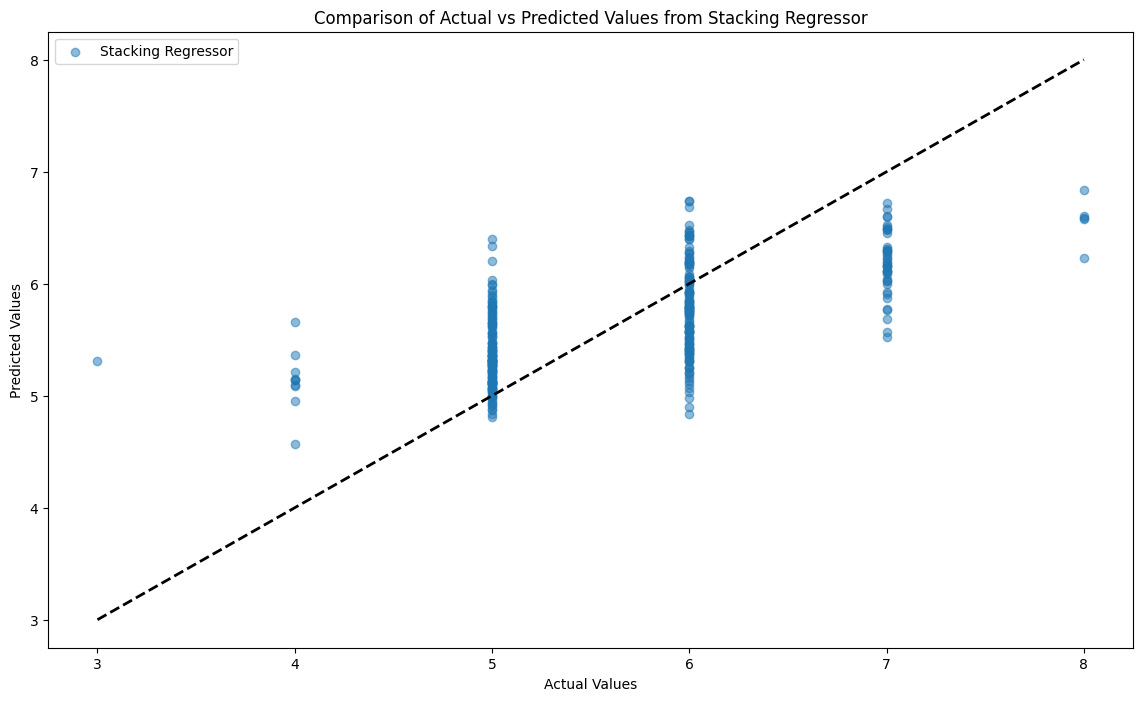

In [91]:
# evaluate stacking model performance
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mean_squared_error(y_test, y_pred_stacking))
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f"Stacking Regressor - MAE: {mae_stacking}, RMSE: {rmse_stacking}, R-squared: {r2_stacking}")

results = pd.DataFrame({
    'Actual': y_test,
    'Stacking': y_pred_stacking
})

plt.figure(figsize=(14, 8))
plt.scatter(results['Actual'], results['Stacking'], label='Stacking Regressor', alpha=0.5)
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Actual vs Predicted Values from Stacking Regressor')
plt.legend()
plt.show()

### Nhận xét từ biểu đồ:
Stacking Regressor (chấm xanh nhạt): Các dự đoán của mô hình có xu hướng khá gần với đường chấm đen (đường lý tưởng y = x), đặc biệt là trong khoảng giá trị trung bình (5-7).
Có một vài điểm ngoại lai (outliers) ở các giá trị nhỏ (khoảng 3) và giá trị lớn (khoảng 8) không hoàn toàn khớp với đường lý tưởng.
### Kết luận:
Stacking Regressor hoạt động tốt trong việc dự đoán giá trị trung bình, nhưng vẫn gặp khó khăn với một số điểm ở các giá trị cực trị. So với các mô hình trước đó, có vẻ mô hình này dự đoán tốt hơn ở khoảng giữa, nhưng vẫn có một số độ lệch nhẹ ở biên